## Decision Tree

**Decision trees** are one of the most popular algorithms used in machine learning, mostly for ***classification*** but also for ***regression*** problems. Our brain works like a decision tree every time we ask ourselves a question before making a decision. For example: is it cloudy outside? If yes, I will bring an umbrella.

- Decision trees where the target variable can take a discrete set of values are called classification trees. 
- Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. 

When training a dataset to classify a variable, the idea of the Decision Tree is to divide the data into smaller datasets based on a certain feature value until the target variables all fall under one category. While the human brain decides to pick the “splitting feature” based on the experience (i.e. the cloudy sky), a computer splits the dataset based on the maximum ***information gain***. 

***Information gain***
Information gain is used to decide which feature to split on at each step in building the tree. Simplicity is best, so we want to keep our tree small. To do so, at each step we should choose the split that results in the purest daughter nodes. A commonly used measure of purity is called information. For each node of the tree, the information value measures how much information a feature gives us about the class. The split with the highest information gain will be taken as the first split and the process will continue until all children nodes are pure, or until the information gain is 0.

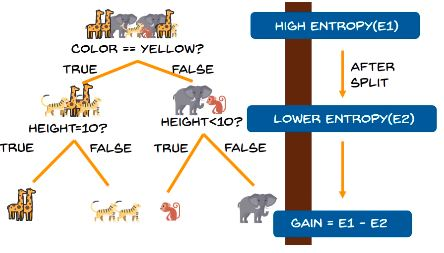
A decision tree is drawn upside down with its root at the top (***root node***). In the image above, the middle step represents a ***condition/internal node***, based on which the tree splits into ***branches/ edges***. The end of the branch that doesn’t split anymore is the ***decision/leaf***, in this case, which animal is it.

**Entropy**
Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.

$$ \large \sum_{i=1}^{k} P(value_i) \log_2 (P(value_i)) $$

Entropy calculation on an example, dataset contains: 3 giraffes, 2 tigers, 1 monkey, 2 elephants = 8 animals in total.

$$ ENTROPY = (\frac{3}{8}) \log_2 (\frac{3}{8}) + (\frac{2}{8}) \log_2 (\frac{2}{8}) + (\frac{1}{8}) \log_2 (\frac{1}{8}) + (\frac{2}{8}) \log_2 (\frac{2}{8}) $$<br>
$$ ENTROPY = 0.571 $$

Entropy is measured between 0 and 1.(Depending on the number of classes in the dataset, entropy can be greater than 1 but it means the same thing , a very high level of disorder).


**Steps for Making decision tree:**
-  Get list of rows (dataset) which are taken into consideration for making decision tree (recursively at each nodes).
-  Calculate uncertanity of our dataset or Gini impurity or how much our data is mixed up etc.
-  Generate list of all question which needs to be asked at that node.
-  Partition rows into True rows and False rows based on each question asked.
-  Calculate information gain based on gini impurity and partition of data from previous step.
-  Update highest information gain based on each question asked.
-  Update best question based on information gain (higher information gain).
-  Divide the node on best question. Repeat again from step 1 again until we get pure node (leaf nodes).

**Advantages of Decision Tree:**

-  Easy to use and understand.
-  Can handle both categorical and numerical data.
-  Resistant to outliers, hence require little data preprocessing.

**Disadvantages of Decision Tree:**

-  Prone to overfitting.
-  Require some kind of measurement as to how well they are doing.
-  Need to be careful with parameter tuning.
-  Can create biased learned trees if some classes dominate.

**Great sources:**
-  https://towardsdatascience.com/decision-tree-an-algorithm-that-works-like-the-human-brain-8bc0652f1fc6
-  https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96
-  https://www.youtube.com/watch?v=RmajweUFKvM&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=16

### Example: Balance Scale 

In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
balance_data = pd.read_csv('data/balance-scale.csv')

In [3]:
print ("Dataset Lenght:: ", len(balance_data))
print ("Dataset Shape:: ", balance_data.shape)

Dataset Lenght::  624
Dataset Shape::  (624, 5)


In [4]:
print ("Dataset:: ")
print(balance_data.head())

Dataset:: 
   B  1  1.1  1.2  1.3
0  R  1    1    1    2
1  R  1    1    1    3
2  R  1    1    1    4
3  R  1    1    1    5
4  R  1    1    2    1


In [5]:
# Separating the target variables
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

In [6]:
# Splitting dataset into training and test
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [7]:
# Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
print(clf_entropy.fit(X_train, y_train))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


In [8]:
# Function to make Prediction
y_pred_en = clf_entropy.predict(X_test)
print(y_pred_en)

['R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'L'
 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R'
 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'L'
 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L'
 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R'
 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R']


In [9]:
# Checking accuracy
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  66.48936170212765
